# **RNN Introduction**


## Importing required libraries


In [22]:
import tensorflow_datasets as tfds
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [3]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1.0,15.0,2.015110e+10
1,2015-11-01 01:00:00,1.0,13.0,2.015110e+10
2,2015-11-01 02:00:00,1.0,10.0,2.015110e+10
3,2015-11-01 03:00:00,1.0,7.0,2.015110e+10
4,2015-11-01 04:00:00,1.0,9.0,2.015110e+10


In [10]:
df['Vehicles'].shape

(48120,)

In [4]:
# apply minmaxscaler
df_min_max = df.copy()
scale1 = MinMaxScaler()
df_min_max['Vehicles'] = scale1.fit_transform(df_min_max[['Vehicles']])

In [5]:
#apply standardscaler
df_standard = df.copy()
scale2 = StandardScaler()
df_standard['Vehicles'] = scale2.fit_transform(df_standard[['Vehicles']])

In [6]:
#apply standardscaler
df_standard = df.copy()
scale2 = StandardScaler()
df_standard['Vehicles'] = scale2.fit_transform(df_standard[['Vehicles']])

## Visualization

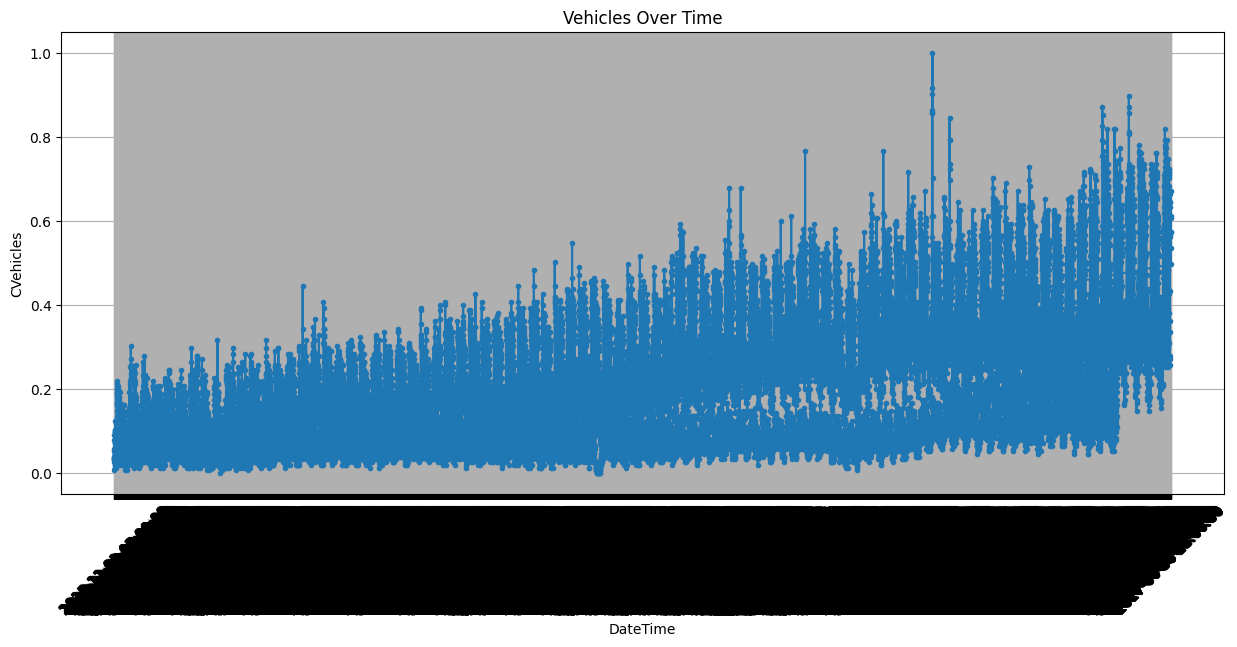

In [7]:
# Line Chart of Vehicles Over Time
#Using minMaxscaler
# Convert 'Date' column to datetime
df_min_max['DateTime'] = pd.to_datetime(df_min_max['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df_min_max['Vehicles'], marker='.')
plt.title('Vehicles Over Time')
plt.xlabel('DateTime')
plt.ylabel('CVehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

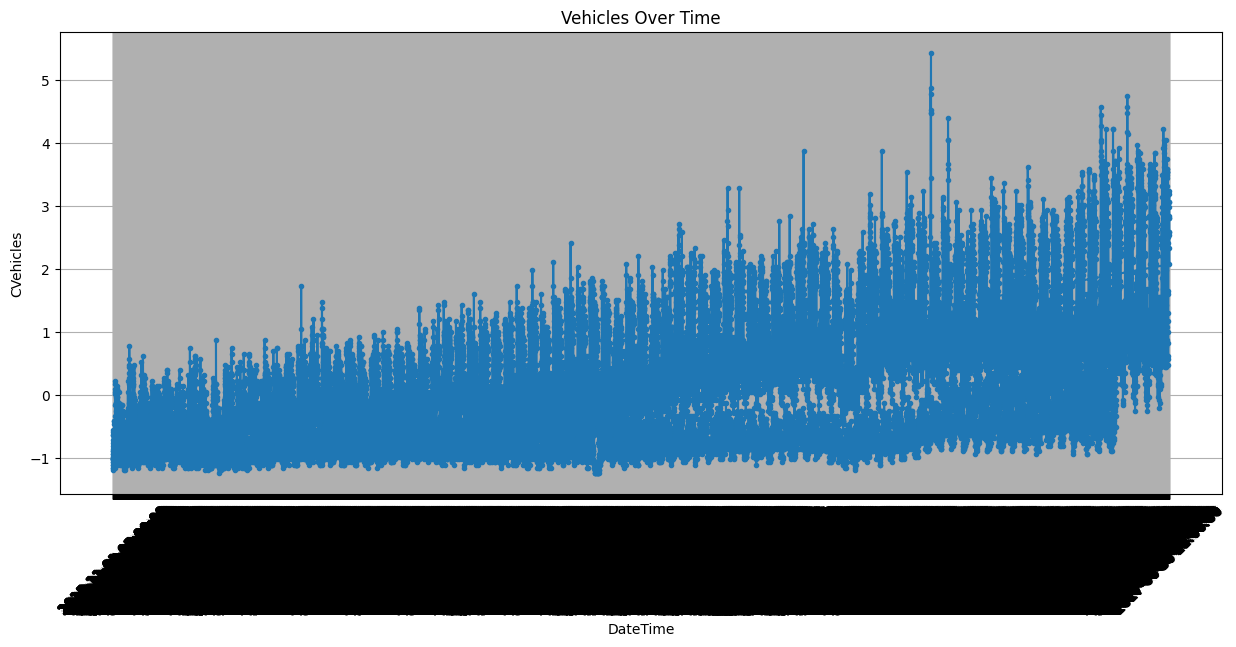

In [8]:
# Line Chart of Vehicles Over Time
#Using Strandarscaler
# Convert 'Date' column to datetime
df_standard['DateTime'] = pd.to_datetime(df_standard['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df_standard['Vehicles'], marker='.')
plt.title('Vehicles Over Time')
plt.xlabel('DateTime')
plt.ylabel('CVehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

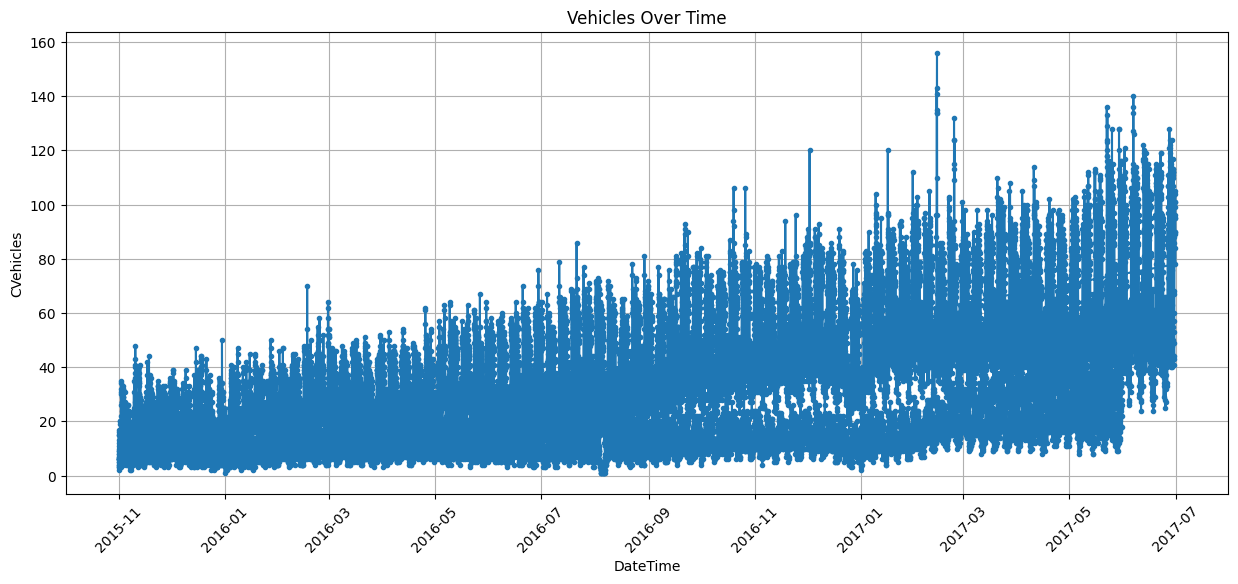

In [9]:
# Line Chart of Vehicles Over Time
#Using Strandarscaler
# Convert 'Date' column to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('Vehicles Over Time')
plt.xlabel('DateTime')
plt.ylabel('CVehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

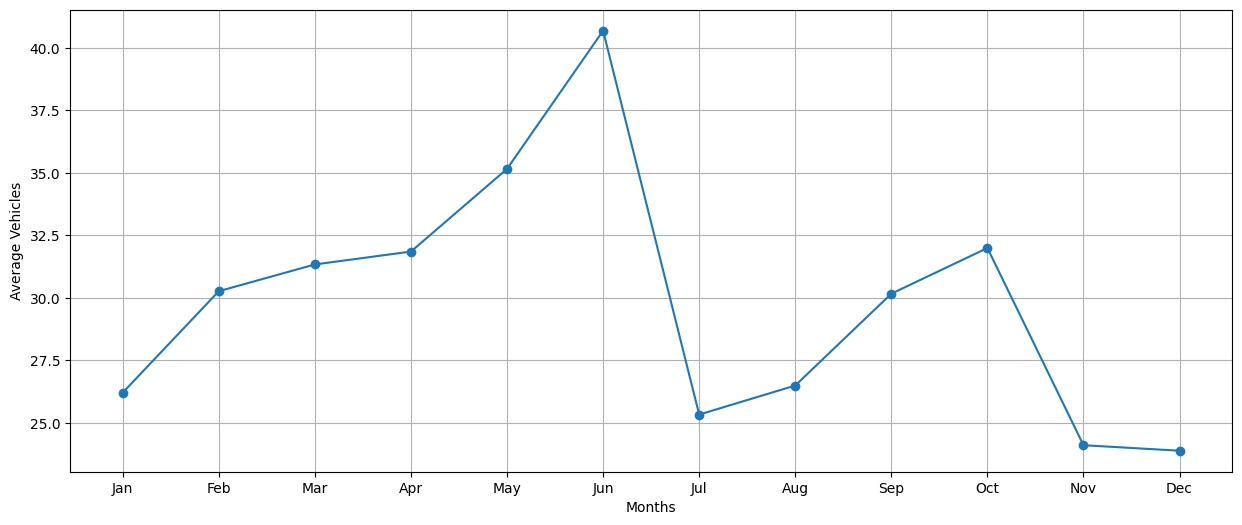

In [10]:

df['Month'] = df['DateTime'].dt.month

monthly_average = df.groupby('Month')['Vehicles'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
#plt.title(f'Monthly Seasonality of {company_name}')
plt.xlabel('Months')
plt.ylabel('Average Vehicles')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [11]:
new_df = df.reset_index()['Vehicles']

In [12]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [15]:
df_withoutDatatime = df.drop('DateTime',axis=1)

In [17]:
df_withoutmonth = df.drop('Month',axis=1)

In [19]:
df.head()

,DateTime,Junction,Vehicles,ID,Month
0,2015-11-01 00:00:00,1.0,15.0,2.015110e+10,11
1,2015-11-01 01:00:00,1.0,13.0,2.015110e+10,11
2,2015-11-01 02:00:00,1.0,10.0,2.015110e+10,11
3,2015-11-01 03:00:00,1.0,7.0,2.015110e+10,11
4,2015-11-01 04:00:00,1.0,9.0,2.015110e+10,11


## Split the data into train and test

In [49]:
X = df.drop(['Junction','ID'],axis=1)
y = df['Junction']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((22756, 3), (5690, 3))

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Number of words to consider as features
max_features = 10000  # This is the vocab size

# Create the tokenizer with the top max_features words
tokenizer = Tokenizer(num_words=max_features)

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [53]:
# Define the maximum length of sequences. You can set this to be the length of the longest sequence or shorter to trim long reviews
max_length = 100

# Pad the sequences to have the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

## Modeling


In [67]:
# Define the RNN model
model = Sequential()
model.add(Embedding(max_features, 32, input_length=max_length))
model.add(SimpleRNN(32))  # Simple RNN layer with 32 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Print model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7761 - acc: 0.0000e+00 - val_loss: 0.7037 - val_acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 106ms/step - loss: 0.5873 - acc: 0.5000 - val_loss: 0.6442 - val_acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 109ms/step - loss: 0.4477 - acc: 0.5000 - val_loss: 0.8816 - val_acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 139ms/step - loss: 0.8866 - acc: 0.0000e+00 - val_loss: 0.5609 - val_acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 104ms/step - loss: 0.2443 - acc: 0.5000 - val_loss: 0.4287 - val_acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 103ms/step - loss: -0.0495 - acc: 0.5000 - val_loss: 0.9152 - val_acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 101ms/step - loss: 0.9117 - acc: 0.0000e+00 - val_loss: 0.8211 - val_acc: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 97ms/step -

## Visualization of results


In [64]:
pred = model.predict(X_test_pad)
pred

1/1 [==============================] - 0s 128ms/step


array([[0.6376691 ],
       [0.61131275],
       [0.5703187 ]], dtype=float32)

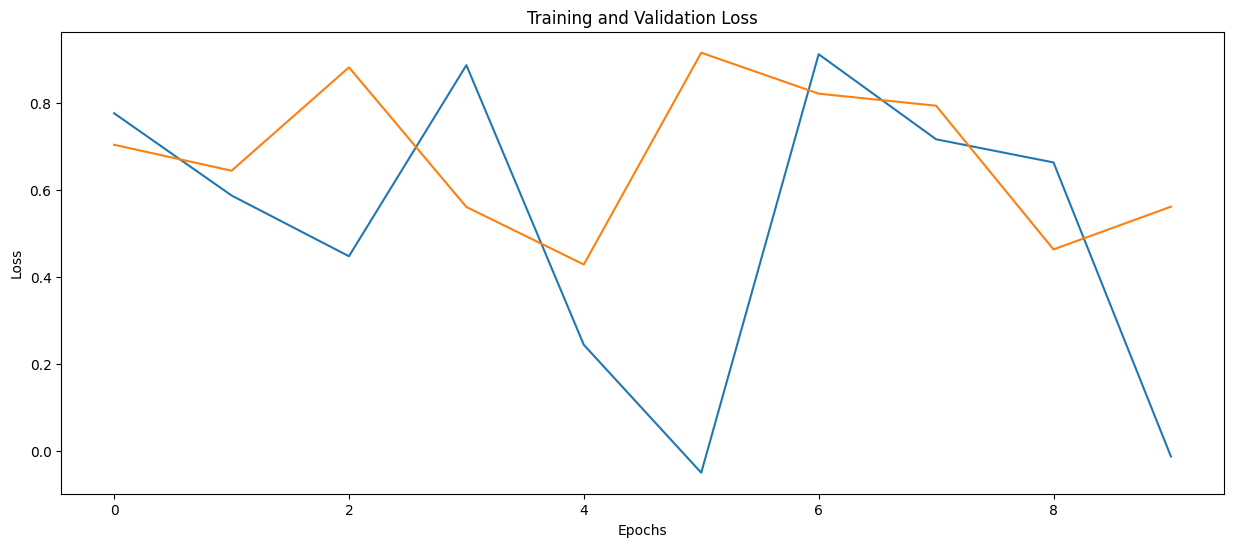

In [65]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Training Loss',)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()